In [ ]:
%pip install visualkeras
%pip install ann_visualizer
%pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 25.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=f2599c783c6e21b033d9e413fc3997555815d2fe7dea20ac20772a94dde7eb81
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np                               # Import numpy
from skimage import data, io   # Import skimage library (data - Test images and example data.
#                          io - Reading, saving, and displaying images.)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)
%matplotlib inline
import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import cv2 as cv
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPooling3D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


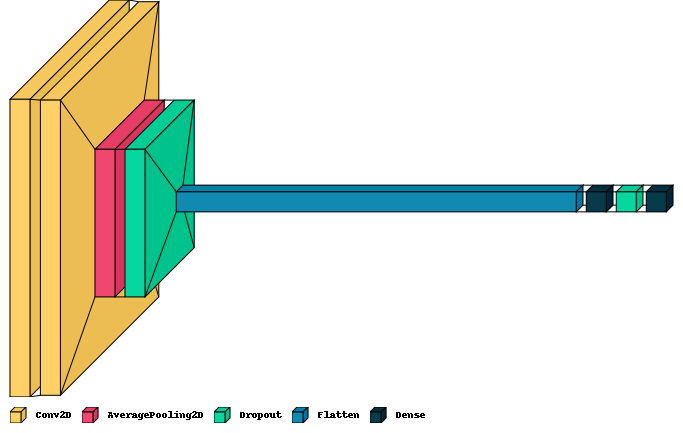

In [3]:
!pip install visualkeras

import visualkeras

# Define the model architecture
base_model = Sequential()
base_model.add(Conv2D(32, (3,3), input_shape=(250, 250, 3), activation='relu'))
base_model.add(Conv2D(64, (3,3), activation='relu'))
base_model.add(AveragePooling2D(pool_size=(2,2)))
base_model.add(Dropout(0.2))
base_model.add(Flatten())
base_model.add(Dense(128, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(units = 10, activation = 'softmax'))

# Convert the model to a visualkeras format
visualkeras.layered_view(base_model, scale_xy=1.2, legend=True)

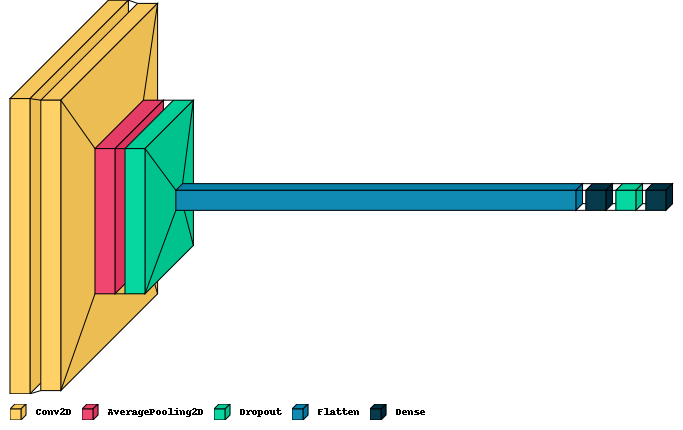

In [4]:
# define the model architecture
modelA = Sequential()

modelA.add(Conv2D(32, (5,5), input_shape=(250, 250, 3), activation='relu'))
modelA.add(Conv2D(64, (5,5), activation='relu'))
modelA.add(AveragePooling2D(pool_size=(2,2)))
modelA.add(Dropout(0.2))
modelA.add(Flatten())
modelA.add(Dense(128, activation='relu'))
modelA.add(Dropout(0.5))
modelA.add(Dense(units=10, activation='softmax'))

# Convert the model to a visualkeras format
visualkeras.layered_view(modelA, scale_xy=1.2, legend=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


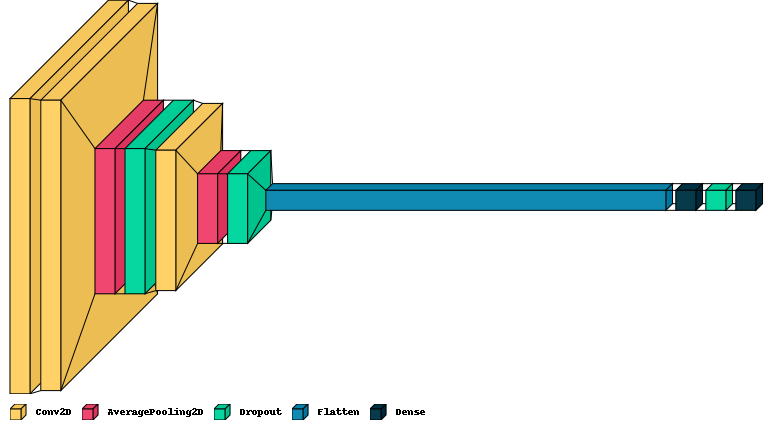

In [ ]:
# define the model architecture
modelB = Sequential()
modelB.add(Conv2D(32, (5,5), input_shape=(250, 250, 3), activation='relu'))
modelB.add(Conv2D(64, (5,5), activation='relu'))
modelB.add(AveragePooling2D(pool_size=(2,2)))
modelB.add(Dropout(0.2))
modelB.add(Conv2D(128, (5,5), activation='relu'))
modelB.add(AveragePooling2D(pool_size=(2,2)))
modelB.add(Dropout(0.2))
modelB.add(Flatten())
modelB.add(Dense(128, activation='relu'))
modelB.add(Dropout(0.5))
modelB.add(Dense(units = 10, activation = 'softmax'))

# create a visualizer instance
visualkeras.layered_view(modelB, scale_xy=1.2, legend=True)


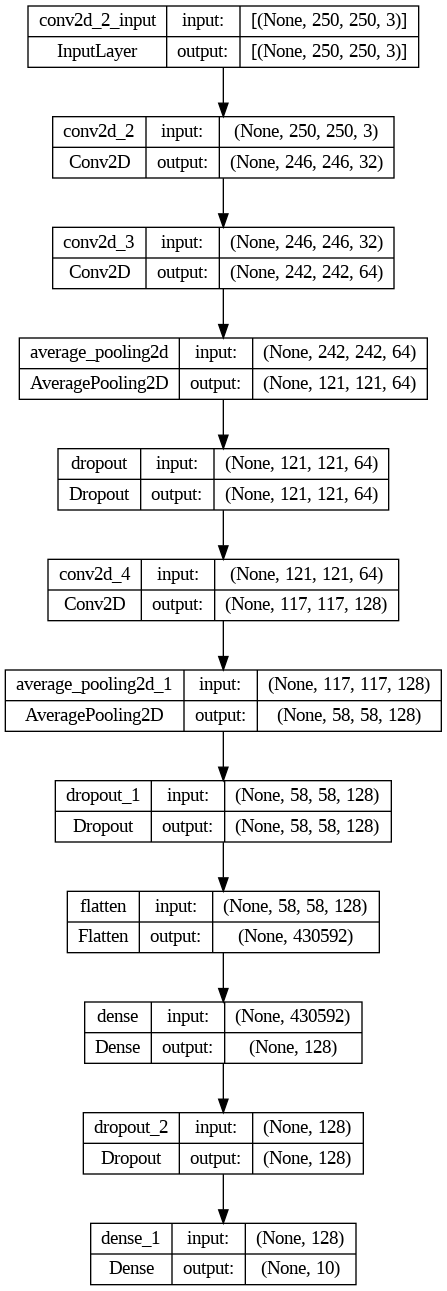

In [ ]:
from keras.utils import plot_model

plot_model(modelB, to_file='modelB.png', show_shapes=True, show_layer_names=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
58889256/58889256 [==============================] - 1s 0us/step


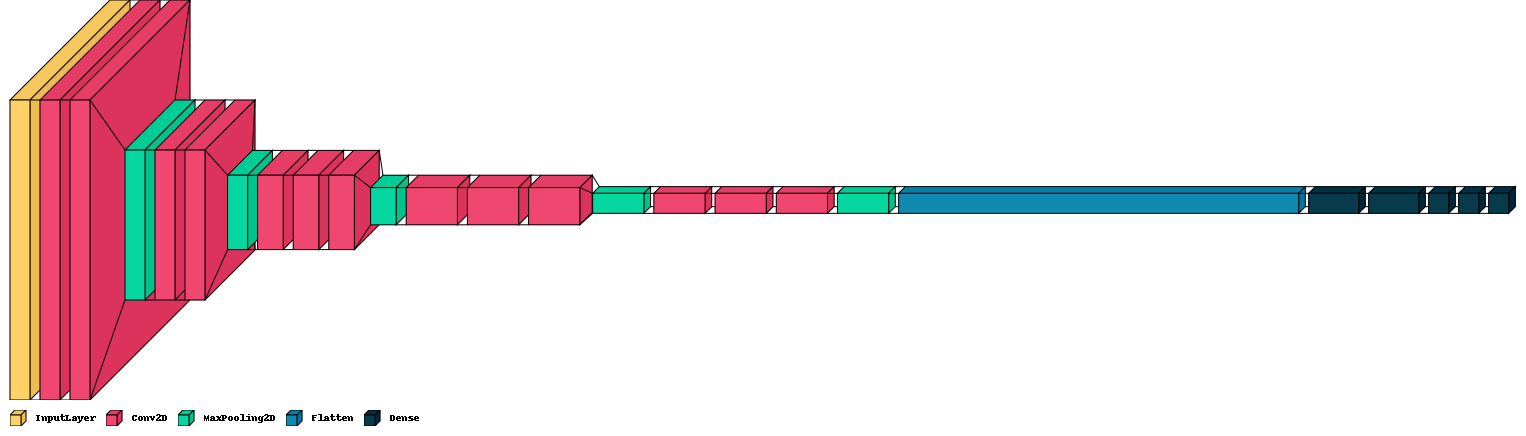

In [ ]:
# initialize the VGG16 model
vgg_model = VGG16(weights='imagenet', input_shape=(250, 250, 3), include_top=False)

# freeze the layers of the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# create the custom top layers
flatten = Flatten()(vgg_model.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=10, activation='sigmoid')(dense_4)

# create the model
model = Model(inputs=vgg_model.input, outputs=dense_output)

# visualize the model architecture
visualkeras.layered_view(model, scale_xy=1.2, legend=True)
